In [39]:
import openpyxl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [40]:
from helpers import verify_worksheet, replace_nulls, sum_features_per_software, keep_top_software

In [41]:
# 1. READ EXCEL FILE
x_file = 'data/SRsoftwareextraction.xlsx'
sheet_name = 'adjudicatedvalues'

verify_worksheet(x_file, sheet_name)
orig_df = pd.read_excel(x_file, sheet_name, engine='openpyxl')
replace_nulls(orig_df)

In [42]:
# Drop empty rows
orig_df.dropna(axis=0, how= 'all', thresh=None, subset=None, inplace=True)
orig_df.tail()

,name,type,field,search,import,expertaddition,tiabscreen,distinctscreen,dualscreen,fulltextpdf,...,comments,functional,free,cloud,living,training,support,flexibility,publicouputs,riskofbias
19,SRDR,full process,healthcare,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
20,SWIFT-Active Screener,screening,multidiscipline,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
21,SWIFT-Review,search and extraction,multidiscipline,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
22,SyRF,screening and extraction,healthcare,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
23,SysRev,full process,multidiscipline,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0


In [43]:
orig_df.to_excel('data/orig_df.xlsx', index=False)

In [44]:
# SUMMARIZE ALL DATA

In [45]:
sum_df = sum_features_per_software(orig_df, 5) # Keep if there are at least 5 non-null features
sum_df.tail()

,name,type,field,search,import,expertaddition,tiabscreen,distinctscreen,dualscreen,fulltextpdf,...,cloud,living,training,support,flexibility,publicouputs,riskofbias,total_features,number_of_features,percent_of_features
19,SRDR,full process,healthcare,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,32,18.0,0.56
20,SWIFT-Active Screener,screening,multidiscipline,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,32,18.0,0.56
21,SWIFT-Review,search and extraction,multidiscipline,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,32,11.0,0.34
22,SyRF,screening and extraction,healthcare,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,32,13.0,0.41
23,SysRev,full process,multidiscipline,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,32,24.0,0.75


In [46]:
# Keep only the top 8 softwares
df = keep_top_software(sum_df, "number_of_features", 8)
df.tail()

,name,type,field,search,import,expertaddition,tiabscreen,distinctscreen,dualscreen,fulltextpdf,...,cloud,living,training,support,flexibility,publicouputs,riskofbias,total_features,number_of_features,percent_of_features
3,SysRev,full process,multidiscipline,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,1.0,0.0,1.0,1.0,1.0,0.0,32,24.0,0.75
4,Cadima,screening,multidiscipline,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,32,23.0,0.72
5,JBI SUMARI,full process,multidiscipline,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,32,23.0,0.72
6,Covidence,full process,healthcare,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,32,23.0,0.72
7,SRDB.PRO,full process,healthcare,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,0.0,1.0,32,22.0,0.69


In [47]:
name = df['name']
percent = df['percent_of_features']
number = df['number_of_features']

captions = []

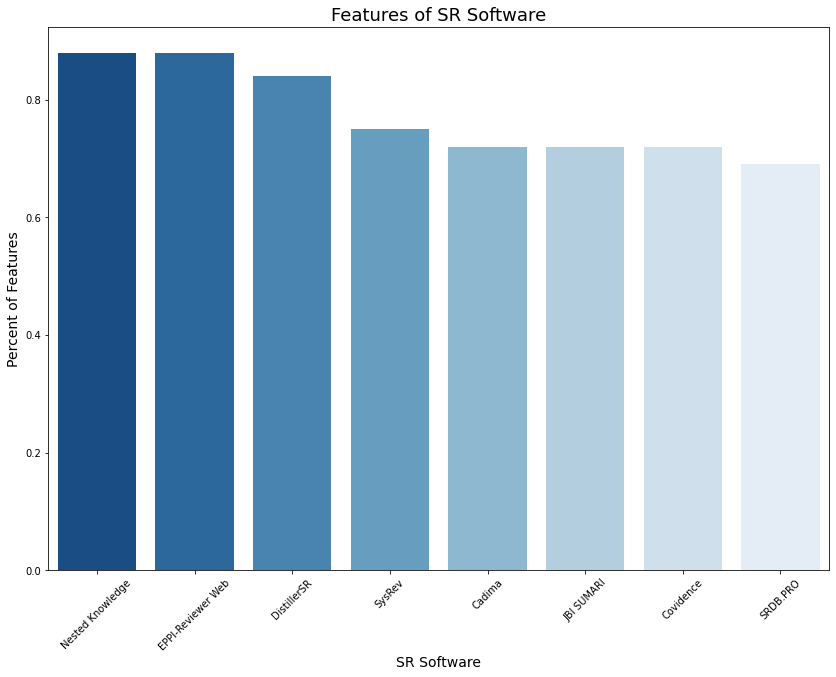

In [48]:
plt.figure(figsize=(14, 10))
ax = sns.barplot(x=name, y=percent, data=sum_df, palette="Blues_r")
ax.set_ylabel('Percent of Features', fontsize=14)
ax.set_xlabel('SR Software', fontsize=14)
ax.set_title('Features of SR Software', fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

captions.append("fig 1. "+"Percent of Features for each SR Software (with a min of 5 non-NA features)")
ax.get_figure().savefig('output/fig1-percent-of-features-top8.png')

In [36]:
# Export original dataframe to breakup by feature class.

In [37]:
# Write all the figure captions to a text file
with open('output/captions.txt', 'w') as f:
    for line in captions:
        f.write(line)
        f.write('\n')

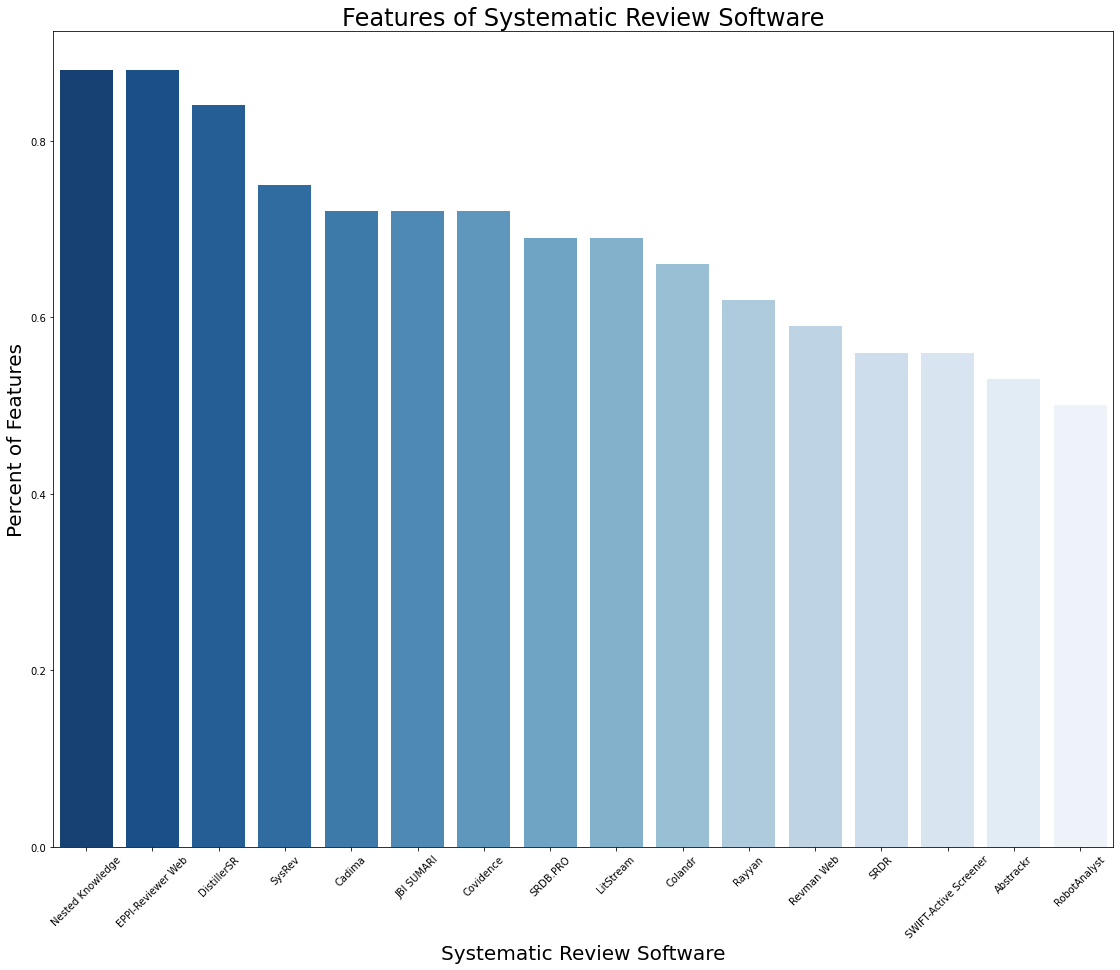

In [38]:
# KEEP THE TOP 16
# Keep only the top 8 softwares
df = keep_top_software(sum_df, "percent_of_features", 16)
df.tail()

name = df['name']
percent = df['percent_of_features']
number = df['number_of_features']

plt.figure(figsize=(19, 15))
ax = sns.barplot(x=name, y=percent, data=sum_df, palette="Blues_r")
ax.set_ylabel('Percent of Features', fontsize=20)
ax.set_xlabel('Systematic Review Software', fontsize=20)
ax.set_title('Features of Systematic Review Software', fontsize=24)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

captions.append("fig 8. "+"Percent of Features for each SR Software (with a min of 5 non-NA features)")
figname = "fig8"
ax.get_figure().savefig('output/fig8-percent-of-features-top16.png')
